# Hospital Readmissions Prediction

# <a id="1"></a> 1. Exploratory Data Analysis

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading Data

In [4]:
data = pd.read_csv("../input/diabetes/diabetic_data.csv")
def display_all(data):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(data)
display_all(data.head())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Variable Description

<span style='font-weight:bold;color:#561225'>Encounter ID:</span> Unique identifier of an encounter
    
<span style='font-weight:bold;color:#561225'>Patient number:</span> Unique identifier of a patient
    
<span style='font-weight:bold;color:#561225'>Race Values:</span> Caucasian, Asian, African American, Hispanic, and other
    
<span style='font-weight:bold;color:#561225'>Gender Values:</span> male, female, and unknown/invalid
    
<span style='font-weight:bold;color:#561225'>Age:</span> Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
   
<span style='font-weight:bold;color:#561225'>Weight:</span> Weight in pounds
  
<span style='font-weight:bold;color:#561225'>Admission type:</span> Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
 
<span style='font-weight:bold;color:#561225'>Discharge disposition:</span> Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

<span style='font-weight:bold;color:#561225'>Admission source:</span> Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

<span style='font-weight:bold;color:#561225'>Time in hospital:</span> Integer number of days between admission and discharge

<span style='font-weight:bold;color:#561225'>Payer code :</span> Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

<span style='font-weight:bold;color:#561225'>Medical specialty:</span> Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

<span style='font-weight:bold;color:#561225'>Number of lab procedures:</span> Number of lab tests performed during the encounter

<span style='font-weight:bold;color:#561225'>Number of procedures:</span> Numeric Number of procedures (other than lab tests) performed during the encounter

<span style='font-weight:bold;color:#561225'>Number of medications:</span> Number of distinct generic names administered during the encounter

<span style='font-weight:bold;color:#561225'>Number of outpatient visits:</span> Number of outpatient visits of the patient in the year preceding the encounter

<span style='font-weight:bold;color:#561225'>Number of emergency visits:</span> Number of emergency visits of the patient in the year preceding the encounter

<span style='font-weight:bold;color:#561225'>Number of inpatient visits:</span> Number of inpatient visits of the patient in the year preceding the encounter

<span style='font-weight:bold;color:#561225'>Diagnosis 1:</span> The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

<span style='font-weight:bold;color:#561225'>Diagnosis 2:</span> Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

<span style='font-weight:bold;color:#561225'>Diagnosis 3:</span> Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

<span style='font-weight:bold;color:#561225'>Number of diagnoses :</span> Number of diagnoses entered to the system 0%

<span style='font-weight:bold;color:#561225'>Glucose serum test :</span> result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

<span style='font-weight:bold;color:#561225'>A1c test result :</span> Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

<span style='font-weight:bold;color:#561225'>Change of medications :</span> Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

<span style='font-weight:bold;color:#561225'>Diabetes medications :</span> Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: <span style='font-weight:bold'>metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, </span> the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

<span style='font-weight:bold;color:#123456'>Readmitted:</span> Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [5]:
data.shape

(101766, 50)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [8]:
IDs_mapping = pd.read_csv("../input/id-mapping/IDs_mapping.csv")
        
display_all(IDs_mapping.head(67))

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


## Target Distribution (Readmitted)

Target content changed to 1-0

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

The variable actually has <30, >30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

NO and >30: 0 <br>
<30 : 1

In [9]:
data.readmitted = [1 if each=='<30' else 0 for each in data.readmitted]

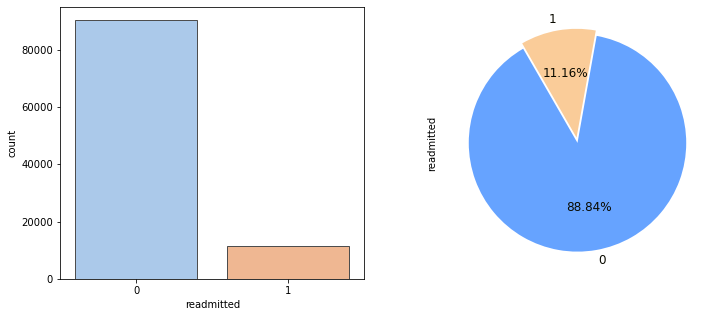

In [10]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['0','1']
sns.countplot(x=data.readmitted, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.readmitted.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

In [11]:
data.replace('?', np.nan , inplace=True)

## Information about Missing values

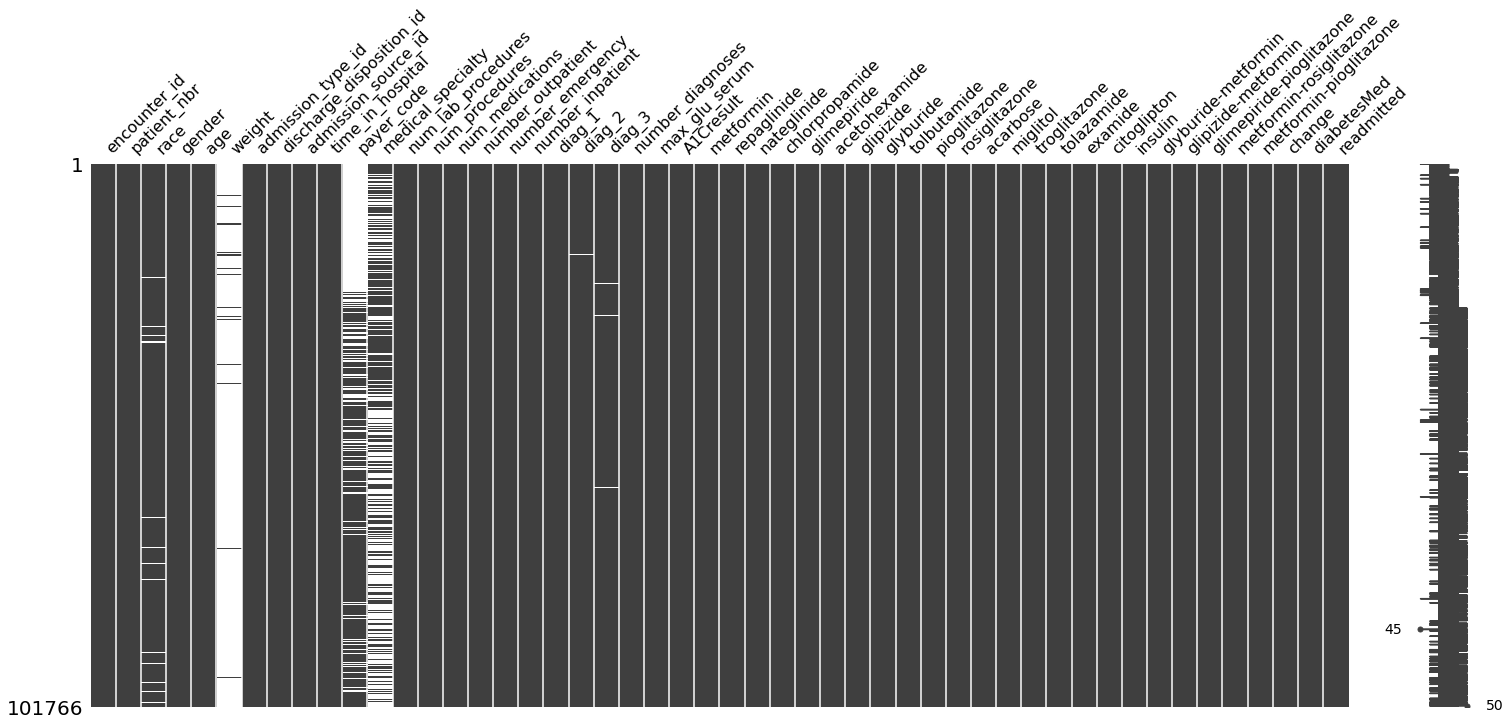

In [12]:
msno.matrix(data)
plt.show()

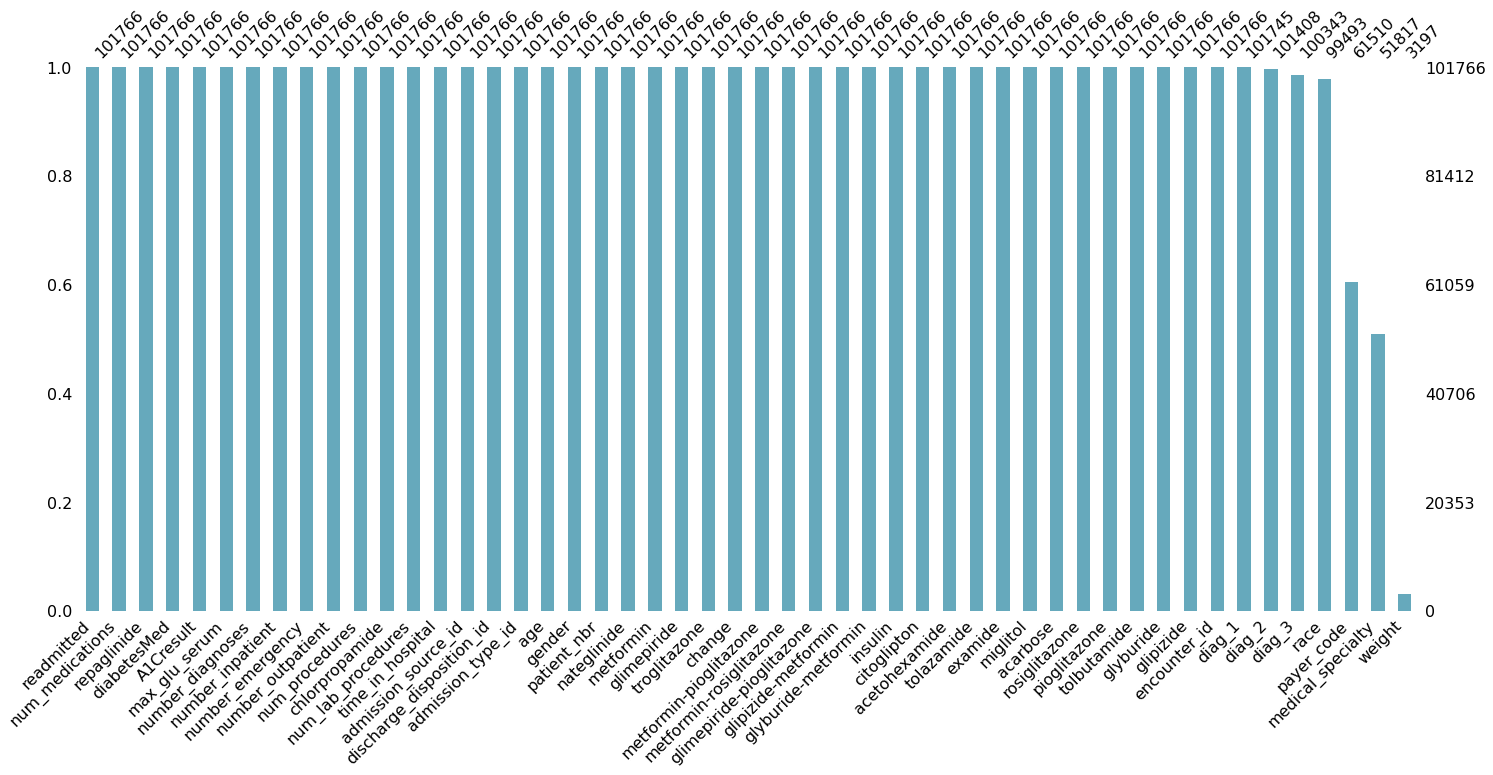

In [13]:
msno.bar(data,sort='descending',color='#66a9bc')
plt.show()

## Representation of missing values, unique values, etc.

In [14]:
def Missing_Values(data):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],4))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "#_Total_Value":total_value,\
                               "#_Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value
                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("#_Total_Missing_Value",ascending=False)

In [15]:
data_info = Missing_Values(data)
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
Variable,,,,,,
weight,101766,98569,0.9686,object,"[nan, [75-100), [50-75), [0-25), [100-125), [2...",10
medical_specialty,101766,49949,0.4908,object,"[Pediatrics-Endocrinology, nan, InternalMedici...",73
payer_code,101766,40256,0.3956,object,"[nan, MC, MD, HM, UN, BC, SP, CP, SI, DM, CM, ...",18
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3


## Types of data measurement scales

In [16]:
data_dictionary = pd.read_csv('../input/dataset/var.csv', sep=';')
data_dictionary = data_dictionary.set_index("variable_name")
data_dictionary.head()

,Variable_Structure
variable_name,
weight,numeric
medical_specialty,nominal
payer_code,nominal
race,nominal
diag_3,nominal


In [17]:
data_info['Variable_Structure'] = np.array(data_dictionary["Variable_Structure"])
data_info

,#_Total_Value,#_Total_Missing_Value,%_Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value,Variable_Structure
Variable,,,,,,,
weight,101766,98569,0.9686,object,"[nan, [75-100), [50-75), [0-25), [100-125), [2...",10,numeric
medical_specialty,101766,49949,0.4908,object,"[Pediatrics-Endocrinology, nan, InternalMedici...",73,nominal
payer_code,101766,40256,0.3956,object,"[nan, MC, MD, HM, UN, BC, SP, CP, SI, DM, CM, ...",18,nominal
race,101766,2273,0.0223,object,"[Caucasian, AfricanAmerican, nan, Other, Asian...",6,nominal
diag_3,101766,1423,0.0140,object,"[nan, 255, V27, 403, 250, V45, 38, 486, 996, 1...",790,nominal
diag_2,101766,358,0.0035,object,"[nan, 250.01, 250, 250.43, 157, 411, 492, 427,...",749,nominal
diag_1,101766,21,0.0002,object,"[250.83, 276, 648, 8, 197, 414, 428, 398, 434,...",717,nominal
encounter_id,101766,0,0.0000,int64,"[2278392, 149190, 64410, 500364, 16680, 35754,...",101766,numeric
tolazamide,101766,0,0.0000,object,"[No, Steady, Up]",3,nominal


Columns that would not give information were removed

In [18]:
drop_list = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
data.drop(drop_list,axis=1, inplace=True)
data_info.drop(drop_list, axis=0,inplace=True)

## Determination of numerical columns:

In [19]:
numerical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="numeric")].index)
len(numerical_columns), numerical_columns

(8,
 ['num_medications',
  'time_in_hospital',
  'num_lab_procedures',
  'num_procedures',
  'number_outpatient',
  'number_emergency',
  'number_inpatient',
  'number_diagnoses'])

## Determination of categorical columns:

In [20]:
categorical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="nominal")].index)
len(categorical_columns), categorical_columns

(35,
 ['race',
  'diag_3',
  'diag_2',
  'diag_1',
  'tolazamide',
  'glyburide',
  'tolbutamide',
  'pioglitazone',
  'rosiglitazone',
  'acarbose',
  'miglitol',
  'troglitazone',
  'acetohexamide',
  'insulin',
  'glyburide-metformin',
  'glipizide-metformin',
  'glimepiride-pioglitazone',
  'metformin-rosiglitazone',
  'metformin-pioglitazone',
  'change',
  'diabetesMed',
  'glipizide',
  'repaglinide',
  'glimepiride',
  'gender',
  'age',
  'admission_type_id',
  'discharge_disposition_id',
  'admission_source_id',
  'chlorpropamide',
  'max_glu_serum',
  'A1Cresult',
  'metformin',
  'nateglinide',
  'readmitted'])

# <a id="2"></a>2. Visualization

## Outlier Visualization With BoxPlot:

In [21]:
def boxplot_for_outlier(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.boxplot(x = df[columns[count]], palette="Wistia",ax=ax[i][j])
            count = count+1

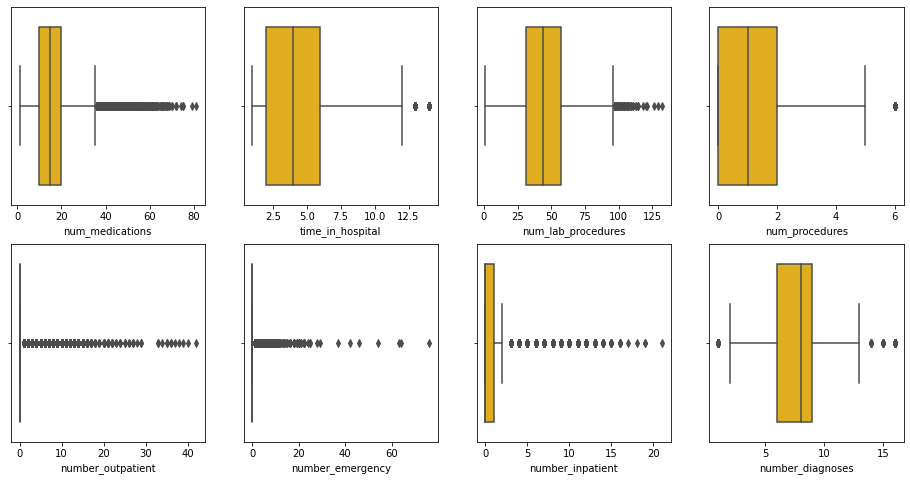

In [22]:
boxplot_for_outlier(data,numerical_columns)

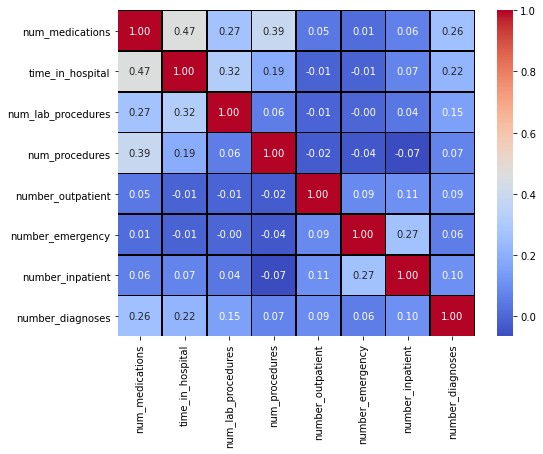

In [23]:
f,ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

## Gender Distribution

In [24]:
data.gender.replace('Unknown/Invalid', np.nan , inplace=True)
data.dropna(subset=['gender'], how='all', inplace = True)

In [25]:
data.gender.value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

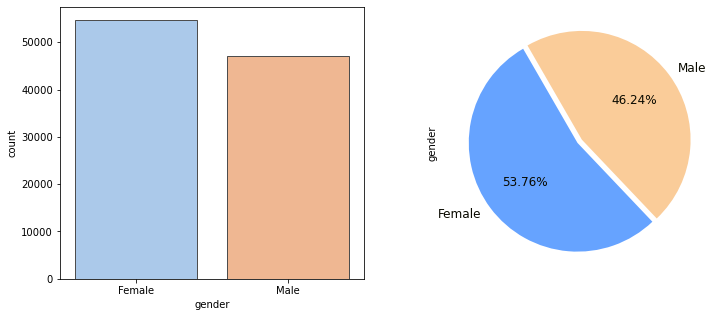

In [26]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(12,5))
labels=['Female','Male']
sns.countplot(x=data.gender, data=data, palette="pastel",ax=ax[0], edgecolor=".3")
data.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'], 
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

### Gender, Age and Race Visualization

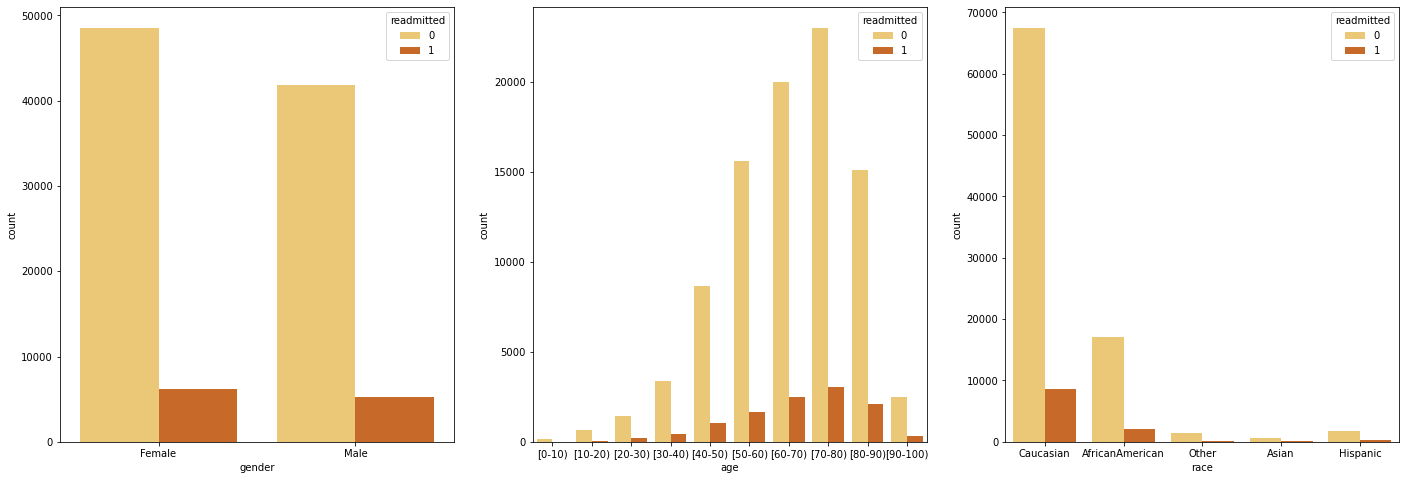

In [27]:
visual_list = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in visual_list:
    sns.countplot(data[i], hue=data.readmitted, palette='YlOrBr', ax=ax[count]);
    count = count+1

### Examination and visualization of the effect of the target variable on insulin variable

In [28]:
data.groupby(by = "insulin").readmitted.mean()

insulin
Down      0.138975
No        0.100380
Steady    0.111284
Up        0.129905
Name: readmitted, dtype: float64

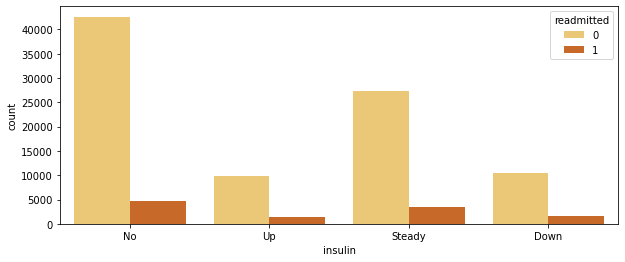

In [29]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(x="insulin", hue="readmitted", data=data, palette="YlOrBr")
plt.show()

### Visualization of the insulin variable according to the age variable:

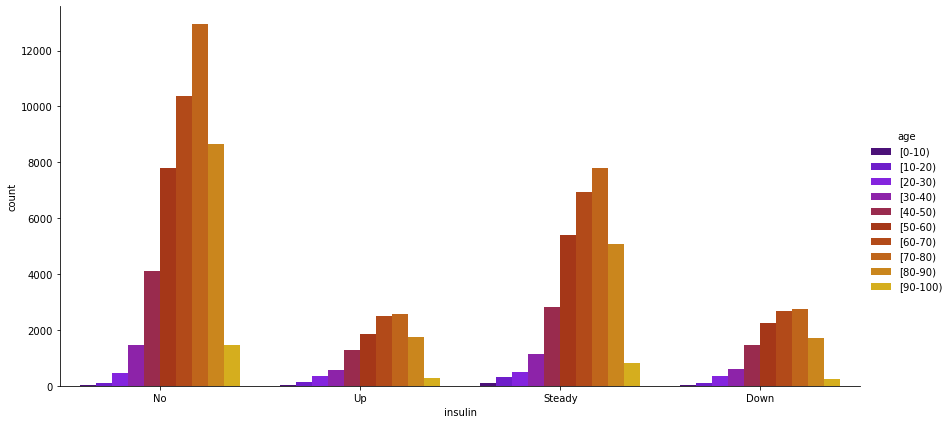

In [30]:
age_list = list(data.age.unique())
sns.catplot(x="insulin", hue="age", data=data, kind="count", height=6, aspect=2, palette="gnuplot");

# <a id="3"></a>3. Feature Engineering

## Missing Value Filling

In [31]:
data["race"].fillna(data["race"].mode()[0], inplace = True)

In [32]:
data["race"].isnull().sum()

0

In [33]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

### Diagnostics 1-2-3 Transform

In [34]:
diag_list = ['diag_1','diag_2','diag_3']

for col in diag_list:
    data[col].fillna('NaN', inplace=True)

In [35]:
import re
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [36]:
for col in diag_list:
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

In [37]:
for col in diag_list:
    data[col] = data[col].apply(transformCategory)

### Distribution of Diag_1, Diag_2 and Diag_3 Variables by Target Variable:

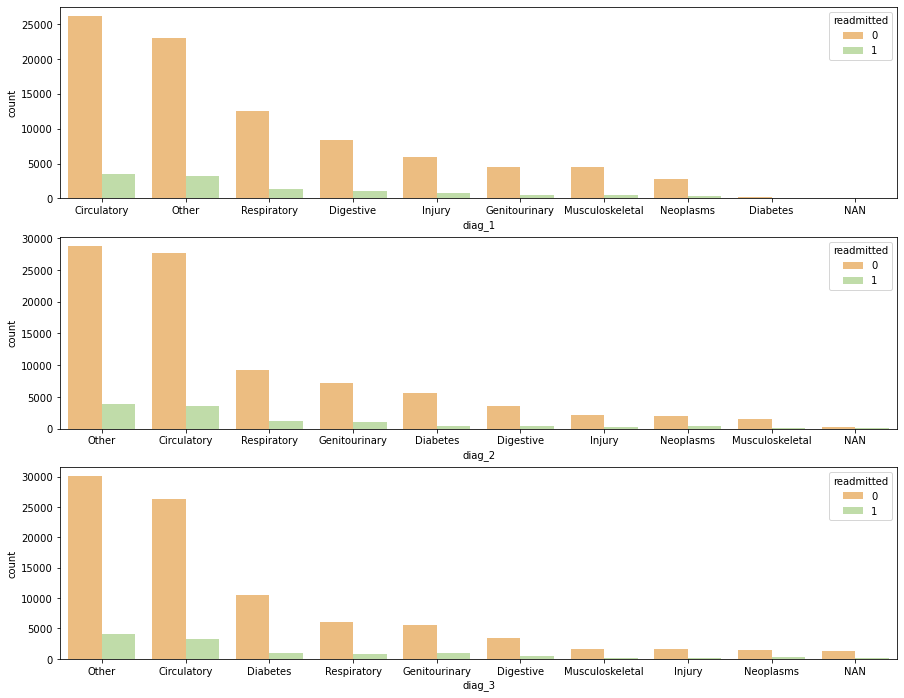

In [38]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diag_list:
    sns.countplot(data[i], hue=data.readmitted, palette='Spectral', ax=ax[count], order = data[i].value_counts().index);
    count = count+1

## Local Outlier Factor

In [39]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 2 , contamination = 0.1)
clf.fit_predict(data[numerical_columns])

array([-1, -1,  1, ..., -1,  1,  1])

In [40]:
df_scores = clf.negative_outlier_factor_
df_scores[0:30]

array([-1.57313218e+00, -5.00000000e+09, -1.21803487e+00, -1.00000000e+00,
       -1.00000000e+00, -1.20710678e+00, -1.11237244e+00, -1.41421356e+00,
       -1.00000000e+00, -1.19553853e+00, -8.53553391e-01, -1.00000000e+00,
       -1.29289322e+00, -1.15973961e+00, -1.14322501e+00, -1.05511154e+00,
       -1.20710678e+00, -9.26776695e-01, -8.53553391e-01, -1.03033009e+00,
       -1.29289322e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.05618622e+00, -1.00000000e+00,
       -1.07647405e+00, -1.00000000e+00])

In [41]:
np.sort(df_scores)[0:30]

array([-4.00000000e+10, -3.51776695e+10, -2.91421356e+10, -2.79110350e+10,
       -2.44948974e+10, -2.23606798e+10, -2.23606798e+10, -2.23536866e+10,
       -2.00000000e+10, -2.00000000e+10, -2.00000000e+10, -1.75000000e+10,
       -1.73205081e+10, -1.73205081e+10, -1.73205081e+10, -1.73205081e+10,
       -1.73205081e+10, -1.73205081e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10, -1.41421356e+10, -1.41421356e+10,
       -1.41421356e+10, -1.41421356e+10])

In [42]:
threshold_value = np.sort(df_scores)[2]

In [43]:
outlier_tf = df_scores > threshold_value
outlier_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [44]:
new_df = data[df_scores > threshold_value]

In [45]:
data[df_scores < threshold_value]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
93655,Caucasian,Female,[70-80),3,6,1,5,35,0,15,...,No,Up,No,No,No,No,No,Ch,Yes,0
97761,Caucasian,Male,[60-70),1,1,7,3,65,0,8,...,No,No,No,No,No,No,No,No,No,0


In [46]:
# Custom encoding for the 21 Drug Features
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in drugs:
    data[col] = data[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    data[col] = data[col].astype(int)

In [47]:
# A1Cresult and max_glu_serum
data['A1Cresult'] = data['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-99])
data['max_glu_serum'] = data['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-99])

In [48]:
# One hot Encoding Race and Id's 
one_hot_data = pd.get_dummies(data, columns=['race'], prefix=["enc"])

columns_ids = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

one_hot_data[columns_ids] = one_hot_data[columns_ids].astype('str')
one_hot_data = pd.get_dummies(one_hot_data, columns=columns_ids)

# <a id="4"></a>4. Train-Test Splitting

In [49]:
df = one_hot_data.copy()
X = df.drop(columns="readmitted", axis=1)
Y = df.readmitted

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

## Encoding

In [51]:
ordinal_enc = OrdinalEncoder()
X_train.age = ordinal_enc.fit_transform(X_train.age.values.reshape(-1, 1))
X_test.age = ordinal_enc.transform(X_test.age.values.reshape(-1, 1))

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [52]:
for col in diag_list:
    label_enc = LabelEncoder()
    X_train[col] = label_enc.fit_transform(X_train[col])
    X_test[col] = label_enc.fit_transform(X_test[col]) 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [53]:
binary = ['change', 'diabetesMed', 'gender']

from category_encoders import BinaryEncoder
binary_enc = BinaryEncoder(cols=binary)
binary_enc.fit_transform(X_train)
X_train = binary_enc.fit_transform(X_train)
X_test = binary_enc.transform(X_test)

### Resampling techniques — Undersample majority class

Since we have an unbalanced dataset, We will use sampling technique.

In [54]:
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted==0]
readmitted = X[X.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted.value_counts()

1    9077
0    9077
Name: readmitted, dtype: int64

In [55]:
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)

## Train-Validation Splitting

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# <a id="5"></a>5. Modelling

## Model Selection

In [57]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm

In [58]:
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision,fscore, specificity

In [59]:
thresh = 0.5

## Model Selection: Baseline Models

## Logistic Regression

In [60]:
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42).fit(X_train, y_train)

In [61]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_val)[:,1]

print("Logistic Regression")
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_fscore, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_val_auc, lr_val_accuracy, lr_val_recall, \
    lr_val_precision,lr_val_fscore, lr_val_specificity = print_report(y_val,y_val_preds, thresh)

Logistic Regression
Training:
AUC:0.675
accuracy:0.623
recall:0.547
precision:0.645
fscore:0.592
specificity:0.699
 
Validation:
AUC:0.644
accuracy:0.600
recall:0.535
precision:0.617
fscore:0.573
specificity:0.666
 


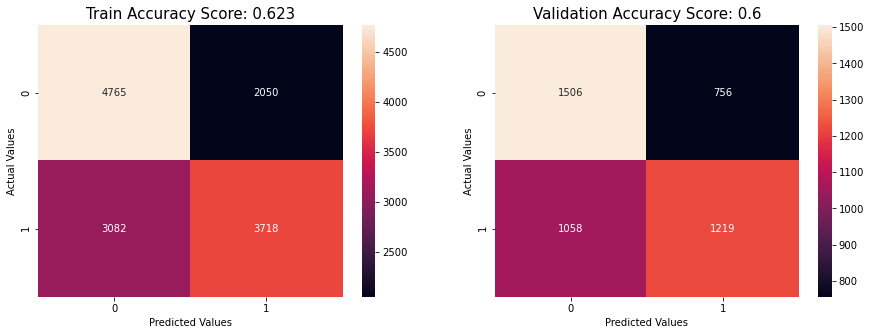

In [62]:
# Confusion Matrix

predictions = log_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = log_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Random Forest Classifier

In [63]:
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [64]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision,rf_train_fscore, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision,rf_val_fscore, rf_val_specificity = print_report(y_val,y_val_preds, thresh)

Random Forest
Training:
AUC:0.668
accuracy:0.620
recall:0.589
precision:0.628
fscore:0.608
specificity:0.651
 
Validation:
AUC:0.640
accuracy:0.598
recall:0.577
precision:0.604
fscore:0.590
specificity:0.620
 


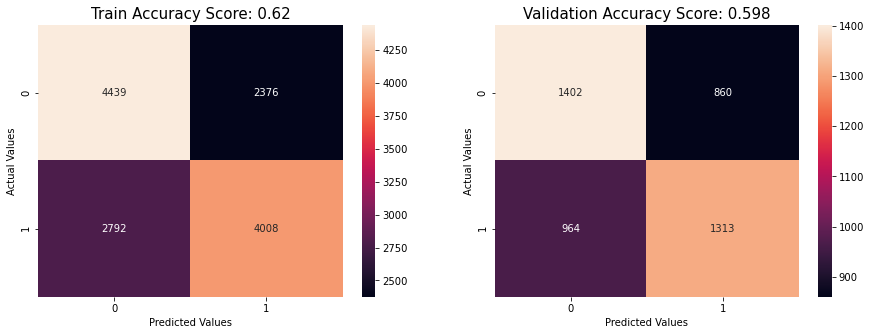

In [65]:
# Confusion Matrix

predictions = random_forest_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = random_forest_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Gradient Boosting Classifier

In [66]:
gradient_model = GradientBoostingClassifier(random_state=42)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision,gbc_train_fscore, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_val_auc, gbc_val_accuracy, gbc_val_recall, gbc_val_precision, gbc_val_fscore, gbc_val_specificity = print_report(y_val,y_val_preds, thresh)

Gradient Boosing
Training:
AUC:0.700
accuracy:0.646
recall:0.615
precision:0.656
fscore:0.635
specificity:0.677
 
Validation:
AUC:0.654
accuracy:0.613
recall:0.596
precision:0.618
fscore:0.607
specificity:0.629
 


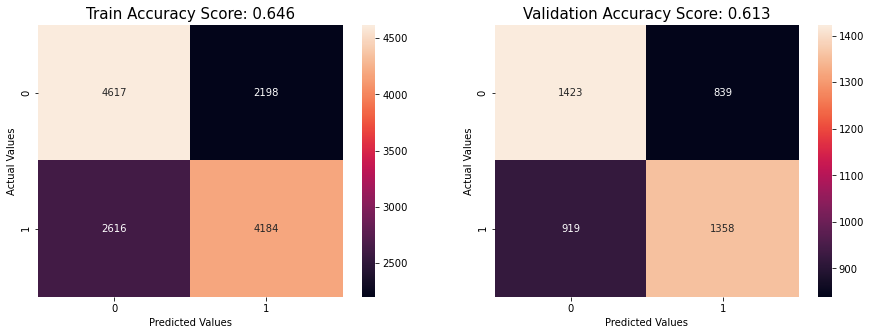

In [68]:
# Confusion Matrix

predictions = gradient_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = gradient_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## XGBOOST Classifier

In [69]:
xgb_model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
y_train_preds = xgb_model.predict_proba(X_train)[:,1]
y_val_preds = xgb_model.predict_proba(X_val)[:,1]

print("XGBOOST")
y_train_preds = gradient_model.predict_proba(X_train)[:,1]
y_val_preds = gradient_model.predict_proba(X_val)[:,1]

print("Gradient Boosing")
print('Training:')
xgb_train_auc, xgb_train_accuracy, xgb_train_recall, xgb_train_precision, xgb_train_fscore, xgb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
xgb_val_auc, xgb_val_accuracy, xgb_val_recall, xgb_val_precision,xgb_val_fscore, xgb_val_specificity = print_report(y_val,y_val_preds, thresh)

XGBOOST
Gradient Boosing
Training:
AUC:0.700
accuracy:0.646
recall:0.615
precision:0.656
fscore:0.635
specificity:0.677
 
Validation:
AUC:0.654
accuracy:0.613
recall:0.596
precision:0.618
fscore:0.607
specificity:0.629
 


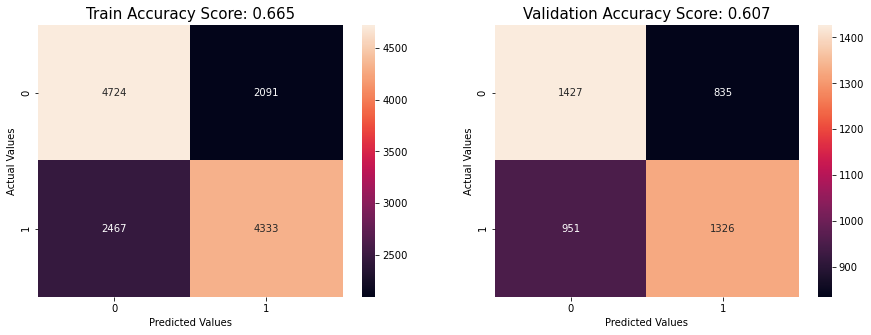

In [71]:
# Confusion Matrix

predictions = xgb_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = xgb_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Light-GBM Classifier

In [72]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(max_depth=3, random_state=42)

In [73]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print("LGBM")
print('Training:')
lgbm_train_auc, lgbm_train_accuracy,lgbm_train_recall, lgbm_train_precision,lgbm_train_fscore,lgbm_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lgbm_val_auc, lgbm_val_accuracy, lgbm_val_recall, lgbm_val_precision,lgbm_val_fscore,lgbm_val_specificity = print_report(y_val,y_val_preds, thresh)

LGBM
Training:
AUC:0.698
accuracy:0.646
recall:0.614
precision:0.656
fscore:0.634
specificity:0.678
 
Validation:
AUC:0.654
accuracy:0.610
recall:0.591
precision:0.616
fscore:0.603
specificity:0.629
 


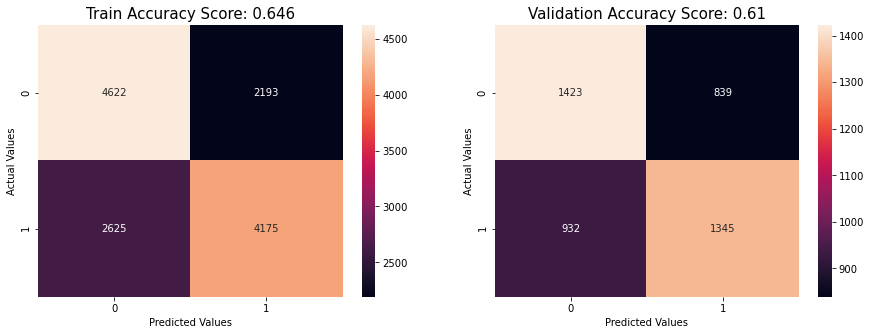

In [74]:
# Confusion Matrix

predictions = lgbm_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = lgbm_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## CATBOOST Classifier

In [75]:
cat_model = CatBoostClassifier(random_state = 42, max_depth=3)
cat_model.fit(X_train, y_train,verbose=False)

In [76]:
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_val_preds = cat_model.predict_proba(X_val)[:,1]

print("CATBOOST")
print('Training:')
catb_train_auc, catb_train_accuracy,catb_train_recall, catb_train_precision,catb_train_fscore,catb_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
catb_val_auc,catb_val_accuracy, catb_val_recall, catb_val_precision,catb_val_fscore,catb_val_specificity = print_report(y_val,y_val_preds, thresh)

CATBOOST
Training:
AUC:0.719
accuracy:0.659
recall:0.618
precision:0.673
fscore:0.644
specificity:0.701
 
Validation:
AUC:0.657
accuracy:0.613
recall:0.585
precision:0.621
fscore:0.603
specificity:0.641
 


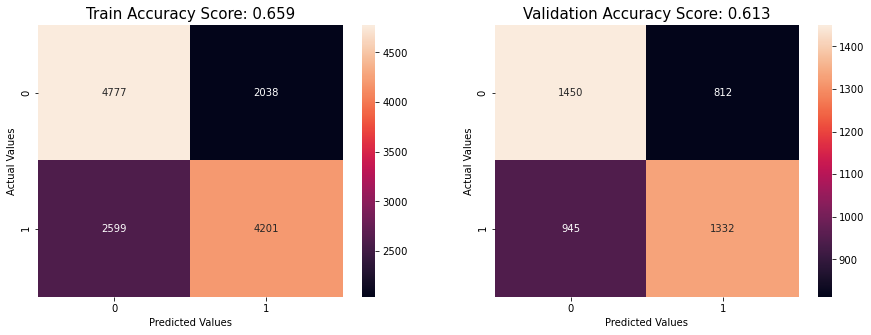

In [77]:
# Confusion Matrix

predictions = cat_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = cat_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

## Analyze results baseline models

In [78]:
base_models_results = pd.DataFrame({'classifier':['LOJ','LOJ','RF','RF','GBM','GBM','XGB','XGB','LGBM','LGBM','CATB','CATB'],
                           'data_set':['train','val']*6,
                          'auc':[lr_train_auc, lr_val_auc,rf_train_auc,rf_val_auc,gbc_train_auc,gbc_val_auc,xgb_train_auc,xgb_val_auc,lgbm_train_auc,lgbm_val_auc,catb_train_auc,catb_val_auc,],
                          'accuracy':[lr_train_accuracy, lr_val_accuracy,rf_train_accuracy,rf_val_accuracy,gbc_train_accuracy,gbc_val_accuracy,xgb_train_accuracy,xgb_val_accuracy,lgbm_train_accuracy,lgbm_val_accuracy,catb_train_accuracy,catb_val_accuracy,],
                          'recall':[lr_train_recall, lr_val_recall,rf_train_recall,rf_val_recall,gbc_train_recall,gbc_val_recall,xgb_train_recall,xgb_val_recall,lgbm_train_recall,lgbm_val_recall,catb_train_recall,catb_val_recall,],
                          'precision':[lr_train_precision, lr_val_precision,rf_train_precision,rf_val_precision,gbc_train_precision,gbc_val_precision,xgb_train_precision,xgb_val_precision,lgbm_train_precision,lgbm_val_precision,catb_train_precision,catb_val_precision,],
                          'fscore':[lr_train_fscore, lr_val_fscore,rf_train_fscore,rf_val_fscore,gbc_train_fscore,gbc_val_fscore,xgb_train_fscore,xgb_val_fscore,lgbm_train_fscore,lgbm_val_fscore,catb_train_fscore,catb_val_fscore,],
                          'specificity':[lr_train_specificity, lr_val_specificity,rf_train_specificity,rf_val_specificity,gbc_train_specificity,gbc_val_specificity,xgb_train_specificity,xgb_val_specificity,lgbm_train_specificity,lgbm_val_specificity,catb_train_specificity,catb_val_specificity,]})

In [79]:
base_models_results

,classifier,data_set,auc,accuracy,recall,precision,fscore,specificity
0,LOJ,train,0.674693,0.623063,0.546765,0.644591,0.591661,0.699193
1,LOJ,val,0.643858,0.600353,0.535354,0.617215,0.573377,0.665782
2,RF,train,0.667576,0.620419,0.589412,0.627820,0.608010,0.651357
3,RF,val,0.640279,0.598149,0.576636,0.604234,0.590112,0.619805
4,GBM,train,0.700067,0.646419,0.615294,0.655594,0.634805,0.677476
5,GBM,val,0.653895,0.612690,0.596399,0.618116,0.607063,0.629089
6,XGB,train,0.700067,0.646419,0.615294,0.655594,0.634805,0.677476
7,XGB,val,0.653895,0.612690,0.596399,0.618116,0.607063,0.629089
8,LGBM,train,0.697602,0.646126,0.613971,0.655622,0.634113,0.678210
9,LGBM,val,0.653716,0.609826,0.590690,0.615842,0.603004,0.629089


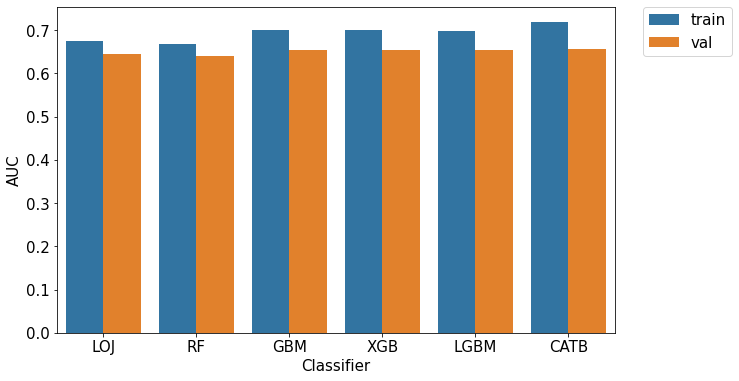

In [80]:
fig, ax = plt.subplots(figsize=(10,6)) 
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=base_models_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

# <a id="6"></a>6. Feature Importance

## Feature İmportance with Light-GBM Classifier

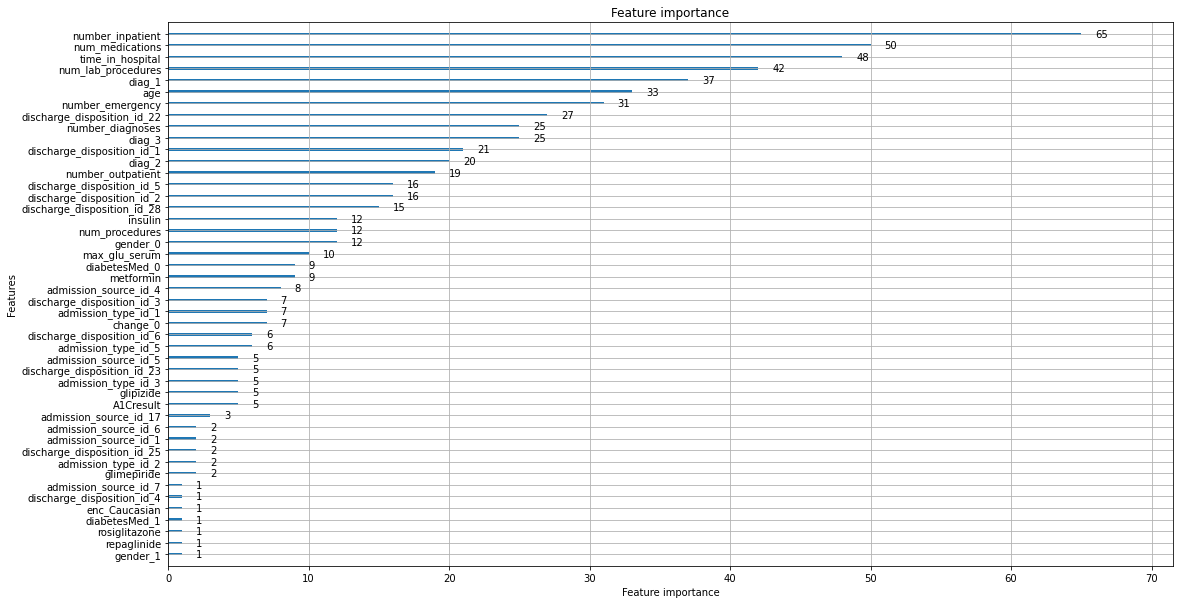

In [81]:
import lightgbm as lgb

plt.rcParams["figure.figsize"] = (18, 10)
lgb.plot_importance(lgbm_model)

feature_imp = pd.Series(lgbm_model.feature_importances_, index = X_train.columns)
best_features = feature_imp.nlargest(25)

In [82]:
best_features.index

Index(['number_inpatient', 'num_medications', 'time_in_hospital',
       'num_lab_procedures', 'diag_1', 'age', 'number_emergency',
       'discharge_disposition_id_22', 'diag_3', 'number_diagnoses',
       'discharge_disposition_id_1', 'diag_2', 'number_outpatient',
       'discharge_disposition_id_2', 'discharge_disposition_id_5',
       'discharge_disposition_id_28', 'gender_0', 'num_procedures', 'insulin',
       'max_glu_serum', 'metformin', 'diabetesMed_0', 'admission_source_id_4',
       'change_0', 'admission_type_id_1'],
      dtype='object')

In [83]:
X_train_importance = X_train[best_features.index]
X_val_importance = X_val[best_features.index]
X_test_importance = X_test[best_features.index]

# <a id="7"></a>7. Hyperparameter Tuning

## Random Forest Classifier Model Tuning

In [84]:
rf = RandomForestClassifier()

In [85]:
rf_params = {"max_depth": [2,5,8],
             "n_estimators": [100,200,500,700],
             "max_features": [3,5,8],
             "min_samples_split":[2,5,10]}

In [86]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, verbose=2).fit(X_train_importance, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  5.4min finished


In [87]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [88]:
rf_tuned =RandomForestClassifier(max_depth=5,
                                 max_features=5,
                                 min_samples_split=5,
                                 n_estimators=500).fit(X_train_importance, y_train)

In [89]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_val_auc_base = roc_auc_score(y_val, y_val_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_val_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_random = rf_tuned.predict_proba(X_val_importance)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_val_auc = roc_auc_score(y_val, y_val_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_val_auc))

Baseline Random Forest
Training AUC:0.668
Validation AUC:0.640
Optimized Random Forest
Training AUC:0.684
Validation AUC:0.651


## Ligth-GBM Classifier Model Tuning

In [90]:
lgbm=LGBMClassifier()

In [91]:
lgbm_params = {"learning_rate":[0.01,0.1,0.05],
              "n_estimators": [100,200,500],
               "subsample":[0.1,0.2],
              "max_depth":[2,3,5,8]}

In [92]:
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=3,n_jobs=-1,verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   46.1s finished


In [93]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.1}

In [94]:
lgbm_tuned=LGBMClassifier(learning_rate=0.1,max_depth=2,n_estimators=200,subsample= 0.1).fit(X_train_importance, y_train)

In [95]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print('Baseline LGBM')
lgbm_train_auc_base = roc_auc_score(y_train, y_train_preds)
lgbm_val_auc_base = roc_auc_score(y_val, y_val_preds)

print('Training AUC:%.3f'%(lgbm_train_auc_base))
print('Validation AUC:%.3f'%(lgbm_val_auc_base))

print('Optimized LGBM')
y_train_preds_lgbm = lgbm_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_lgbm = lgbm_tuned.predict_proba(X_val_importance)[:,1]

lgbm_train_auc = roc_auc_score(y_train, y_train_preds_lgbm)
lgbm_val_auc = roc_auc_score(y_val, y_val_preds_lgbm)

print('Training AUC:%.3f'%(lgbm_train_auc))
print('Validation AUC:%.3f'%(lgbm_val_auc))

Baseline LGBM
Training AUC:0.698
Validation AUC:0.654
Optimized LGBM
Training AUC:0.690
Validation AUC:0.655


## CATBOOST Classifier Model Tuning

In [96]:
catb=CatBoostClassifier()

In [97]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.05,0.1],
            "depth":[4,5,8]}

In [98]:
catb_cv_model=GridSearchCV(catb,catb_params, cv=3, n_jobs=-1,  verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.4min finished


0:	learn: 0.6896969	total: 9.64ms	remaining: 1.92s
1:	learn: 0.6862356	total: 23ms	remaining: 2.27s
2:	learn: 0.6834832	total: 37ms	remaining: 2.43s
3:	learn: 0.6807750	total: 48.3ms	remaining: 2.36s
4:	learn: 0.6781228	total: 59ms	remaining: 2.3s
5:	learn: 0.6760011	total: 68.3ms	remaining: 2.21s
6:	learn: 0.6740409	total: 79.8ms	remaining: 2.2s
7:	learn: 0.6722216	total: 94ms	remaining: 2.26s
8:	learn: 0.6705293	total: 106ms	remaining: 2.24s
9:	learn: 0.6690317	total: 118ms	remaining: 2.24s
10:	learn: 0.6677113	total: 130ms	remaining: 2.23s
11:	learn: 0.6663275	total: 143ms	remaining: 2.24s
12:	learn: 0.6648451	total: 156ms	remaining: 2.25s
13:	learn: 0.6637720	total: 174ms	remaining: 2.31s
14:	learn: 0.6626675	total: 192ms	remaining: 2.36s
15:	learn: 0.6616420	total: 210ms	remaining: 2.42s
16:	learn: 0.6605651	total: 228ms	remaining: 2.46s
17:	learn: 0.6597930	total: 243ms	remaining: 2.45s
18:	learn: 0.6589781	total: 265ms	remaining: 2.52s
19:	learn: 0.6582597	total: 283ms	remaining

In [99]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 200, 'learning_rate': 0.05}

In [100]:
catb_tuned =CatBoostClassifier(depth=5,iterations=200,learning_rate=0.05).fit(X_train_importance, y_train)

0:	learn: 0.6896969	total: 9.5ms	remaining: 1.89s
1:	learn: 0.6862356	total: 22ms	remaining: 2.18s
2:	learn: 0.6834832	total: 34.4ms	remaining: 2.26s
3:	learn: 0.6807750	total: 46.3ms	remaining: 2.27s
4:	learn: 0.6781228	total: 60.2ms	remaining: 2.35s
5:	learn: 0.6760011	total: 68.3ms	remaining: 2.21s
6:	learn: 0.6740409	total: 80.5ms	remaining: 2.22s
7:	learn: 0.6722216	total: 92.9ms	remaining: 2.23s
8:	learn: 0.6705293	total: 106ms	remaining: 2.26s
9:	learn: 0.6690317	total: 121ms	remaining: 2.3s
10:	learn: 0.6677113	total: 134ms	remaining: 2.31s
11:	learn: 0.6663275	total: 148ms	remaining: 2.32s
12:	learn: 0.6648451	total: 163ms	remaining: 2.35s
13:	learn: 0.6637720	total: 179ms	remaining: 2.38s
14:	learn: 0.6626675	total: 194ms	remaining: 2.39s
15:	learn: 0.6616420	total: 216ms	remaining: 2.48s
16:	learn: 0.6605651	total: 231ms	remaining: 2.49s
17:	learn: 0.6597930	total: 242ms	remaining: 2.45s
18:	learn: 0.6589781	total: 256ms	remaining: 2.44s
19:	learn: 0.6582597	total: 270ms	rem

In [101]:
y_train_preds = cat_model.predict_proba(X_train)[:,1]
y_valid_preds = cat_model.predict_proba(X_val)[:,1]

print('Baseline CATBOOST')
catb_train_auc_base = roc_auc_score(y_train, y_train_preds)
catb_val_auc_base = roc_auc_score(y_val, y_val_preds)

print('Training AUC:%.3f'%(catb_train_auc_base))
print('Validation AUC:%.3f'%(catb_val_auc_base))

print('Optimized CATBOOST')
y_train_preds_catb = catb_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_catb = catb_tuned.predict_proba(X_val_importance)[:,1]

catb_train_auc = roc_auc_score(y_train, y_train_preds_catb)
catb_val_auc = roc_auc_score(y_val, y_val_preds_catb)

print('Training AUC:%.3f'%(catb_train_auc))
print('Validation AUC:%.3f'%(catb_val_auc))

Baseline CATBOOST
Training AUC:0.719
Validation AUC:0.654
Optimized CATBOOST
Training AUC:0.704
Validation AUC:0.656


## Hyperparameter Tuning Results

In [102]:
data_results = pd.DataFrame({'classifier':['RF','RF','LGBM','LGBM','CATB','CATB'],
                           'data_set':['base','optimized']*3,
                          'auc':[rf_val_auc_base,rf_val_auc,
                                 lgbm_val_auc_base,lgbm_val_auc,
                                 catb_val_auc_base,catb_val_auc,],
                          })

In [103]:
data_results

,classifier,data_set,auc
0,RF,base,0.640279
1,RF,optimized,0.650747
2,LGBM,base,0.653716
3,LGBM,optimized,0.655360
4,CATB,base,0.653716
5,CATB,optimized,0.655600


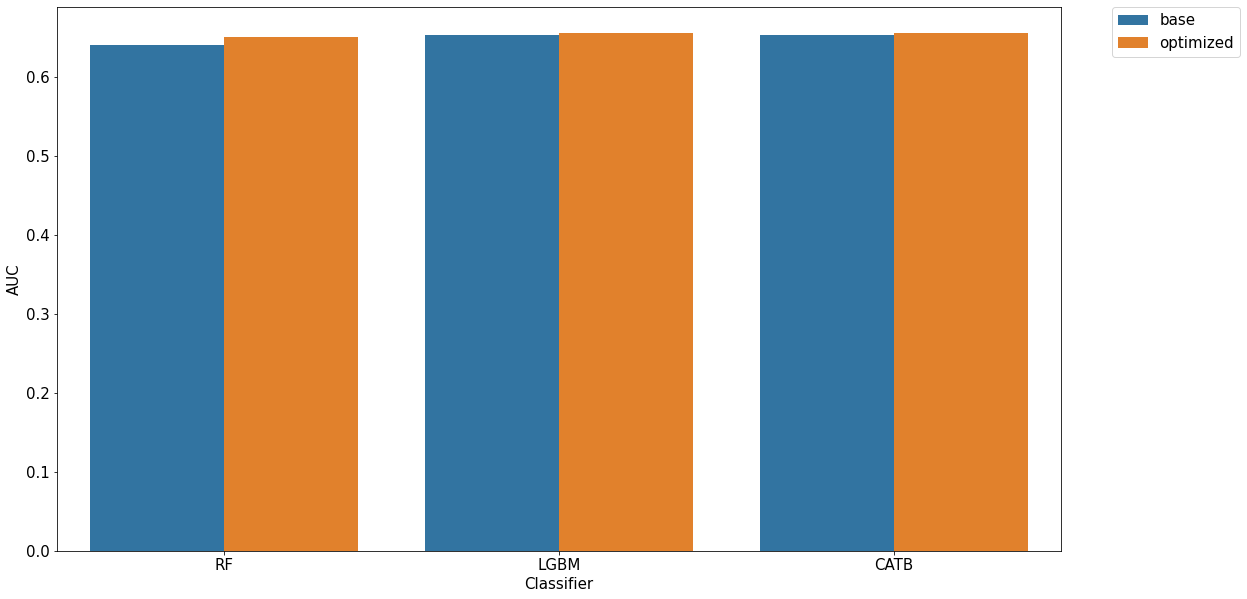

In [104]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=data_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Roc-Auc Comparison of Models

In [105]:
classifiers = [ rf_tuned,
                lgbm_tuned,
                catb_tuned]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_test_importance)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table.sort_values('auc',ascending=False,inplace=True)

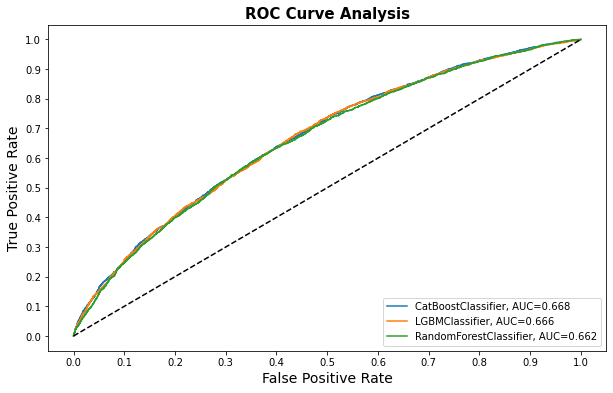

In [106]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=14)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=14)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [107]:
def test_scores(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    
    return auc, accuracy, recall


classifiers = [ rf_tuned,
                lgbm_tuned,
                catb_tuned]

# Define a result table as a DataFrame
test_result = pd.DataFrame(columns=['classifiers', 'accuracy','recall','auc'])

# Train the models and record the results
for cls in classifiers:
    y_test_preds = cls.predict_proba(X_test_importance)[:,1]
    
    test_auc, test_accuracy, test_recall = test_scores(y_test,y_test_preds, 0.5) # thresh = 0.5
    
    test_result = test_result.append({'classifiers':cls.__class__.__name__,
                                        'accuracy':test_accuracy, 
                                        'recall':test_recall, 
                                        'auc':test_auc}, ignore_index=True)


# Set name of the classifiers as index labels
test_result.set_index('classifiers', inplace=True)
test_result.sort_values('auc',ascending=False,inplace=True)

In [108]:
test_result

,accuracy,recall,auc
classifiers,,,
CatBoostClassifier,0.642037,0.586500,0.667644
LGBMClassifier,0.639320,0.581135,0.665777
RandomForestClassifier,0.613398,0.622709,0.661819


In [109]:
import plotly.graph_objs as go

trace1=go.Bar(
                x=test_result.index,
                y=test_result.accuracy,
                name="Accuracy",
                marker= dict(color = 'rgba(100, 20, 30, 0.7)',
                            line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.accuracy,3),textposition='auto')
trace2=go.Bar(
                x=test_result.index,
                y=test_result.recall,
                name="Recall",
                marker=dict(color = 'rgba(56, 140, 200, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.recall,3),textposition='auto')
trace3=go.Bar(
                x=test_result.index,
                y=test_result.auc,
                name="AUC",
                marker=dict(color = 'rgba(120, 180, 20, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=round(test_result.auc,3),textposition='auto')

edit_df=[trace1,trace2,trace3]
layout = { 'barmode':'group',
           'title_text':'Accuracy, Recall and AUC Plot Readmitted' }

fig= go.Figure(data=edit_df,layout=layout)
#plt.savefig('graph.png')
fig.show()

# <a id="8"></a>8. Prediction Result

## Model Selection: Best Classifier

In [110]:
best_model = catb_tuned

y_train_preds = best_model.predict_proba(X_train_importance)[:,1]
y_valid_preds = best_model.predict_proba(X_val_importance)[:,1]
y_test_preds = best_model.predict_proba(X_test_importance)[:,1]

In [111]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_fscore, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
val_auc, val_accuracy, val_recall, val_precision, val_fscore,val_specificity = print_report(y_val,y_val_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_fscore, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.704
accuracy:0.646
recall:0.614
precision:0.656
fscore:0.634
specificity:0.679
 
Validation:
AUC:0.654
accuracy:0.610
recall:0.591
precision:0.616
fscore:0.603
specificity:0.629
 
Test:
AUC:0.668
accuracy:0.642
recall:0.586
precision:0.175
fscore:0.270
specificity:0.649
 


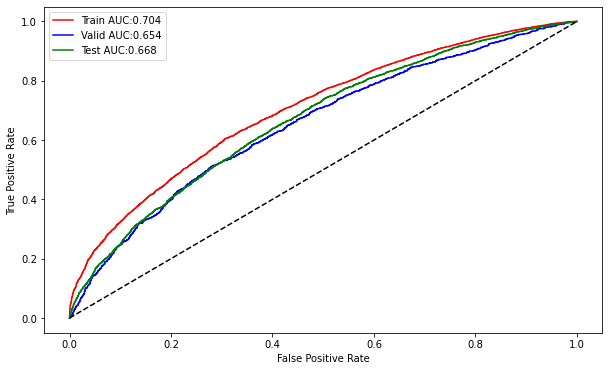

In [112]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_preds)
auc_val = roc_auc_score(y_val, y_val_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

fig, ax = plt.subplots(figsize=(10,6)) 
plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_val, tpr_val, 'b-',label ='Valid AUC:%.3f'%auc_val)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# <a id="9"></a>9. Conclusion

Based on the Auc results observed in the best classifier train, validation and test set results. It was observed that the best model was Catboost. The test result was almost %67 succesful. it was concluded that %67 of the patients who returned to the patient within 30 days returned and predicted correctly.

# <a id="10"></a>10. References

* https://www.kaggle.com/iabhishekofficial/prediction-on-hospital-readmission
* https://github.com/andrewwlong/diabetes_readmission

### <p style='font-weight:bold;color:#123456'><i>I hope you find this kernel useful. If you like it please do an upvote.</i><p>